| **Inicio** | **atrás 7** | **Siguiente 9** |
|----------- |-------------- |---------------|
| [🏠](../README.md) | [⏪](./7_Support_Vector_Machine.ipynb)| [⏩](./9_Plot_Confusion_Matrix.ipynb)|

# **8. Logistic Regression**

![Logistic Regression](../img/Logistic_Regression.webp "Logistic Regression")

La regresión logística es un algoritmo de aprendizaje supervisado utilizado para predecir la probabilidad de que una instancia pertenezca a una categoría en particular. Aunque su nombre incluye "regresión", la regresión logística se utiliza para problemas de clasificación, no de regresión. Es particularmente útil cuando la variable objetivo es binaria (dos clases), aunque se puede extender a problemas de clasificación multiclase.

**Terminología:**

1. **Función Sigmoide (Logística):**

 La función sigmoide es la piedra angular de la regresión logística. Se define como:

  $\sigma(z) = \frac{1}{1 + e^{-z}}$

   donde:

   *  $( z )$ es una combinación lineal de las características del modelo.

2. **Hipótesis Logística:**

 La hipótesis logística es la aplicación de la función sigmoide a la combinación lineal de las características. La fórmula es:

  $h_{\theta}(x) = \sigma(\theta^Tx)$

   donde:

   * $h_{\theta}(x)$ es la probabilidad de que $( y = 1 )$ dadas las características $( x )$ y los parámetros del modelo $( \theta )$.

3. **Función de Costo Logarítmica (Entropía Cruzada):**

La función de costo mide cuán bien el modelo está prediciendo las etiquetas reales. La función de costo para la regresión logística es:

 $J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}[y^{(i)}\log(h_{\theta}(x^{(i)})) + (1-y^{(i)})\log(1-h_{\theta}(x^{(i)}))]$

  donde:

  * $( m )$ es el número de ejemplos de entrenamiento.

4. **Gradiente Descendente:**

 Se utiliza para minimizar la función de costo ajustando iterativamente los parámetros del modelo. Los parámetros se actualizan en la dirección opuesta al gradiente de la función de costo.

**Fórmulas Matemáticas:**

- **Función Sigmoide:**

 $\sigma(z) = \frac{1}{1 + e^{-z}}$

- **Hipótesis Logística:**

 $h_{\theta}(x) = \sigma(\theta^Tx)$

- **Función de Costo Logarítmica:**

 $J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}[y^{(i)}\log(h_{\theta}(x^{(i)})) + (1-y^{(i)})\log(1-h_{\theta}(x^{(i)}))]$

**Ejemplo en Código Python:**

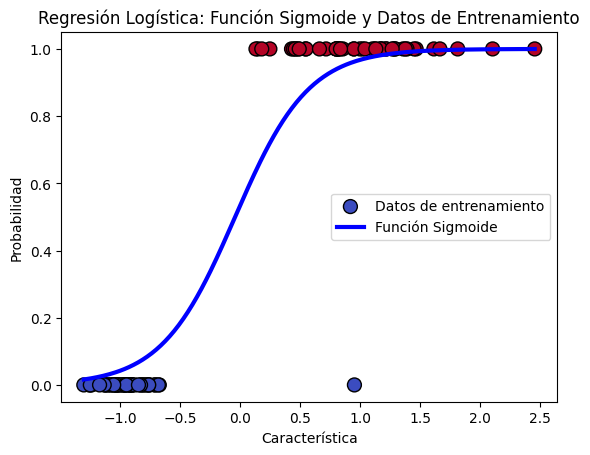

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generar datos de ejemplo
X, y = make_classification(n_samples=100, n_features=1, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X, y)

# Visualizar la función sigmoide y los datos
plt.scatter(X, y, c=y, cmap='coolwarm', edgecolors='k', marker='o', s=100, label='Datos de entrenamiento')
X_test = np.linspace(X.min(), X.max(), 300)
y_prob = model.predict_proba(X_test.reshape(-1, 1))[:, 1]
plt.plot(X_test, y_prob, color='blue', linewidth=3, label='Función Sigmoide')
plt.xlabel('Característica')
plt.ylabel('Probabilidad')
plt.title('Regresión Logística: Función Sigmoide y Datos de Entrenamiento')
plt.legend()
plt.show()

Este código genera datos de ejemplo, entrena un modelo de regresión logística y visualiza la función sigmoide junto con los datos de entrenamiento.

### **Ejemplo**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Crear un conjunto de datos sintético
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Crear un DataFrame
df = pd.DataFrame(data=np.c_[X, y], columns=['Feature1', 'Feature2', 'Label'])
df

,Feature1,Feature2,Label
0,1.228312,-0.757178,0.0
1,0.698409,-1.380295,0.0
2,2.548817,2.502258,1.0
3,0.573579,-1.352979,0.0
4,0.585900,-1.337457,0.0
...,...,...,...
95,0.473358,-1.438620,0.0
96,1.233323,1.239336,1.0
97,0.460109,-1.487396,0.0
98,0.679631,0.757837,1.0


Precisión del modelo de Regresión Logística: 1.00


/home/puma/anaconda3/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


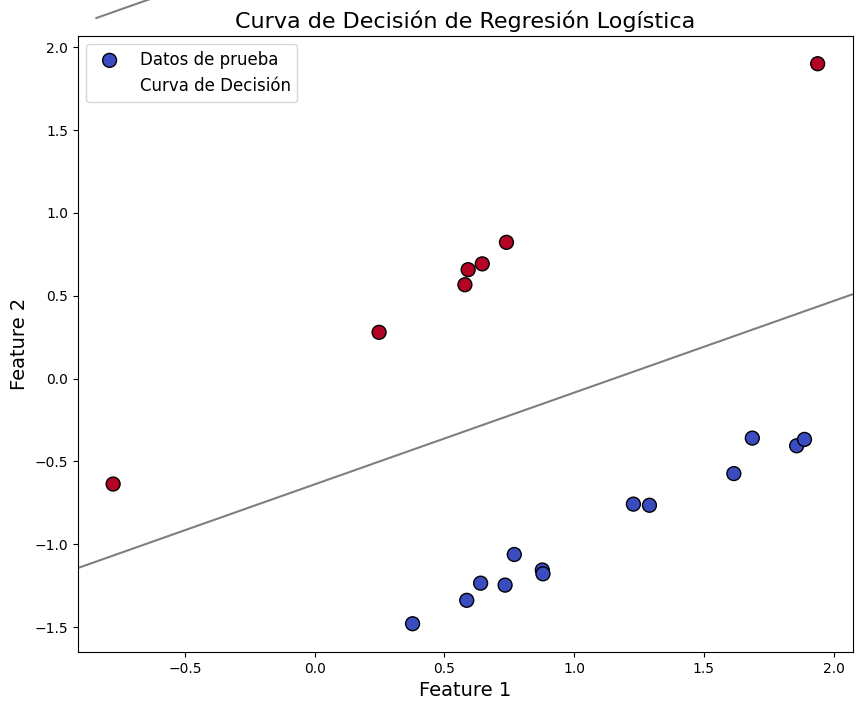

In [3]:
# Separar las características (X) y las etiquetas (y)
X = df[['Feature1', 'Feature2']]
y = df['Label']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo de regresión logística
logreg_model = LogisticRegression(random_state=42)

# Entrenar el modelo de regresión logística
logreg_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_logreg = logreg_model.predict(X_test)

# Calcular la precisión del modelo de regresión logística
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'Precisión del modelo de Regresión Logística: {accuracy_logreg:.2f}')

# Personalizar la gráfica de dispersión y curva de decisión
plt.figure(figsize=(10, 8))

# Scatter plot para el conjunto de datos de prueba
plt.scatter(X_test['Feature1'], X_test['Feature2'], c=y_test, cmap='coolwarm', edgecolors='k', marker='o', s=100, label='Datos de prueba')

# Límites de decisión del modelo de regresión logística
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Crear una cuadrícula para evaluar el modelo
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = logreg_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualizar la curva de decisión con líneas personalizadas
contour = plt.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

# Personalizar etiquetas de las líneas de contorno
contour.collections[0].set_label('Curva de Decisión')

# Etiquetas y título
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.title('Curva de Decisión de Regresión Logística', fontsize=16)

# Añadir una leyenda con tamaño de letra personalizado
plt.legend(fontsize=12)

# Mostrar la gráfica
plt.show()



| **Inicio** | **atrás 7** | **Siguiente 9** |
|----------- |-------------- |---------------|
| [🏠](../README.md) | [⏪](./7_Support_Vector_Machine.ipynb)| [⏩](./9_Plot_Confusion_Matrix.ipynb)|